# Análisis estadístico

## Obtención de base de datos

In [74]:
import mysql.connector as connection
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [75]:
def queryDF(q) -> pd.DataFrame:
    try:
        mydb = connection.connect(host="localhost", database = 'practica',user="root", passwd="root", use_pure=True)
        result_dataFrame = pd.read_sql(q, mydb)
    except Exception as e:
        print('Excepcion', str(e))
        result_dataFrame = None
    finally:
        mydb.close()
    return result_dataFrame

In [76]:
empleados = queryDF('select * from em_empleados')
proyectos = queryDF('select * from pr_proyectos')
asignaciones = queryDF('select * from pr_empleados_proyecto')

C:\Users\eyuste\AppData\Local\Temp\ipykernel_14232\2671971924.py:4: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  result_dataFrame = pd.read_sql(q, mydb)


In [77]:
empleados.head()

,B_SERVMILITAR,CX_EDOCIVIL,F_ALTA,F_BAJA,F_NACIMIENTO,ID_EMPLEADO,N_TELEFONO1,N_TELEFONO2,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,TX_NIF,TX_NOMBRE
0,N,C,1976-10-13,2008-11-15,1986-02-18,1,726303432,260219970,White,Phillips,alfred.white@gmail.com,88953399G,Alfred
1,N,C,1993-07-18,None,1993-03-25,2,218370049,434866459,Hamilton,Welch,leila.hamilton@gmail.com,42401933C,Leila
2,N,S,1996-08-18,2010-01-20,1978-10-23,3,227605855,151699997,Fletcher,Wilson,bertie.fletcher@gmail.com,52971090P,Bertie
3,S,C,1981-01-09,2000-09-06,1991-10-17,4,103324683,445420824,Adkins,Butler,barry.adkins@gmail.com,41056311G,Barry
4,N,C,2001-12-20,None,1979-06-16,5,620005126,597053420,Morgan,Bates,emma.morgan@gmail.com,70090020R,Emma


## Estadísticas

#### Empleados
- Top 5 empleados que más años llevan en la compañía
- Top 5 empleados más recientes
- Distribución del número de años de los empleados en la empresa
- Evolución temporal de altas por años
- Evolución temporal de bajas por años (se puede combinar con la anterior si se desea)
- ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?
- Distribución de empleados solteros vs casados
- Distribución de la edad de los empleados
- Edad media y desviación típica de los empleados

#### Proyectos
- Número de proyectos activos, finalizados y total
- Distribución de la duración de los proyectos (histograma)
- Distribución de proyectos por lugar

#### Proyectos y Empleados
- Distribución del número de proyectos a los que están asignados los empleados en activo. 
- Ejemplo: 
	- Personas asignadas a 1 proyecto: 54, 
	- Personas asignadas a 2 proyectos: 12,
	- Personas asignadas a 3 proyectos: 2
- Top 5 proyectos con más personas asignadas
- Lista de proyectos sin personas asignadas (detección de anomalía)  


### Empleados

#### Top 5 empleados que más años llevan en la compañía

In [78]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'])[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasAnyos = ordenados.head(5)
top5MasAnyos

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
5,39581105Y,Johanna,Soto,Gonzales,johanna.soto@gmail.com,1988-10-10
44,28370947P,Roy,Guzman,Franklin,roy.guzman@gmail.com,1990-04-24
67,44704219U,Eula,Wilkerson,Lowe,eula.wilkerson@gmail.com,1991-01-04
11,67412007O,Cory,Leonard,Simon,cory.leonard@gmail.com,1991-09-22
66,47299129S,Glenn,Copeland,Santos,glenn.copeland@gmail.com,1991-12-16


#### Top 5 empleados más recientes

In [79]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Ordenar por antiguedad
ordenados = disponibles.sort_values(['F_ALTA'], ascending=False)[
    ['TX_NIF', 'TX_NOMBRE', 'TX_APELLIDO1', 'TX_APELLIDO2', 'TX_EMAIL', 'F_ALTA']]
# Limitar a los 5
top5MasRecientes = ordenados.head(5)
top5MasRecientes

,TX_NIF,TX_NOMBRE,TX_APELLIDO1,TX_APELLIDO2,TX_EMAIL,F_ALTA
38,13701029X,Harvey,Nichols,Thornton,harvey.nichols@gmail.com,2019-05-15
54,79260073L,Jimmy,Wong,Schneider,jimmy.wong@gmail.com,2015-10-01
46,87541974K,Devin,Bailey,Hunt,devin.bailey@gmail.com,2014-08-09
25,48825826D,Clara,Santos,Davidson,clara.santos@gmail.com,2014-05-26
70,83007275T,Isabelle,Allen,Cruz,isabelle.allen@gmail.com,2013-07-22


#### Distribución del número de años de los empleados en la empresa

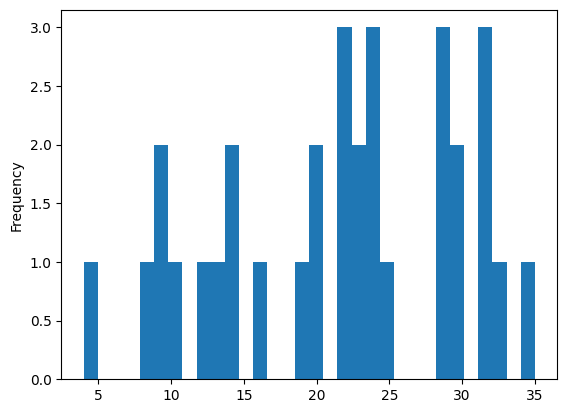

In [80]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Numero de años
anyosAlta = disponibles['F_ALTA'].astype('str').str.split('-').str[0].astype('int')
nAnyos = 2023 - anyosAlta

nAnyos.plot.hist(bins=nAnyos.max() - nAnyos.min() + 1)
plt.show()

#### Evolución temporal de altas por años y Evolución temporal de bajas por años

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


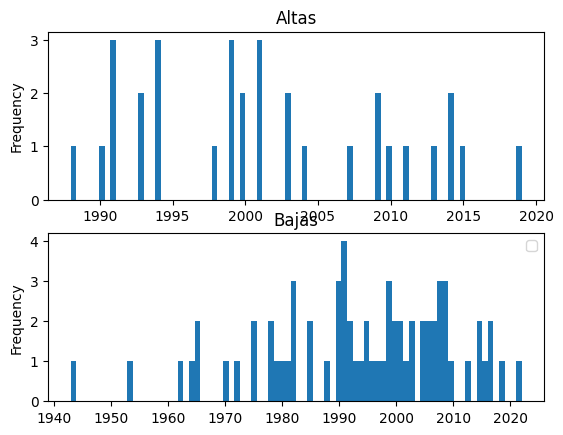

In [81]:
# Dados de baja
deBaja = empleados.loc[empleados['F_BAJA'].notna()].copy()
anyosBaja = deBaja['F_BAJA'].astype('str').str.split('-').str[0].astype('int')

fig, axes = plt.subplots(nrows=2, ncols=1)
minim = min(anyosAlta.min(), anyosBaja.min())
maxim = max(anyosAlta.max(), anyosBaja.max())
anyosAlta.plot.hist(ax=axes[0], bins= maxim - minim + 1, title='Altas')
anyosBaja.plot.hist(ax=axes[1], bins= maxim - minim + 1, title='Bajas')
plt.show()


#### ¿Cuáles han sido los dos años de mayor crecimiento/decrecimiento de empleados?

In [82]:
anyosCrecimiento = anyosAlta.value_counts().sort_values(ascending=False).head(2).reset_index()
anyosDecrecimiento = anyosBaja.value_counts().sort_values(ascending=False).head(2).reset_index()

print(
    'Mayor crecimiento: ',
    ', '.join([
        f'{y} con {n} altas'
        for y, n in zip(anyosCrecimiento['F_ALTA'], anyosCrecimiento['count'])]))

print(
    'Mayor decrecimiento: ',
    ', '.join([
        f'{y} con {n} bajas'
        for y, n in zip(anyosDecrecimiento['F_BAJA'], anyosDecrecimiento['count'])]))


Mayor crecimiento:  1999 con 3 altas, 1994 con 3 altas
Mayor decrecimiento:  1991 con 4 bajas, 1999 con 3 bajas



#### Distribución de empleados solteros vs casados

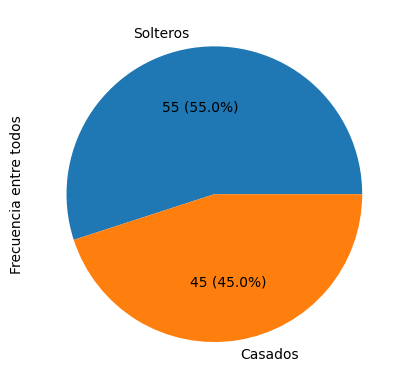

In [83]:
ecivil = empleados['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre todos',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(empleados) / 100)} ({round(x, 2)}%)')
plt.show()

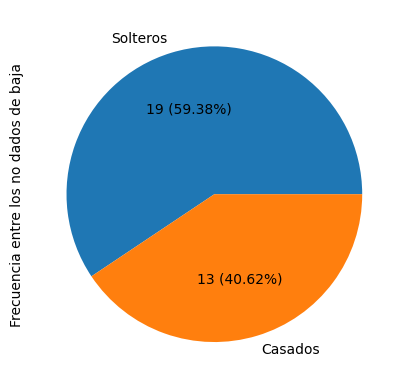

In [84]:
ecivil = disponibles['CX_EDOCIVIL'].value_counts()
ecivil = ecivil
ecivil.plot.pie(
    label='Frecuencia entre los no dados de baja',
    labels = ['Solteros', 'Casados'],
    autopct=lambda x: f'{round(x * len(disponibles) / 100)} ({round(x, 2)}%)')
plt.show()


#### Distribución de la edad de los empleados

<Axes: ylabel='Frequency'>

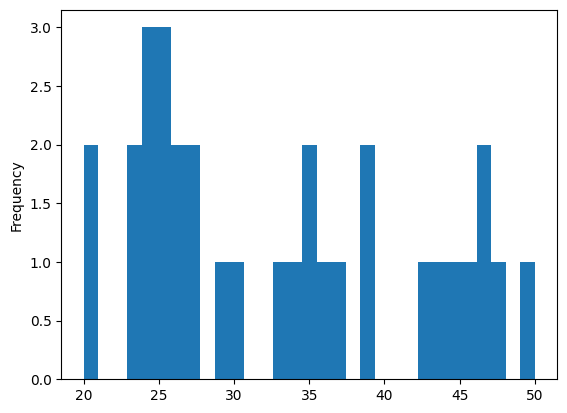

In [85]:
# No dados de baja
disponibles = empleados.loc[empleados['F_BAJA'].isna()].copy()
# Edad de años
year = datetime.now().year
edadEmpleados = year - disponibles['F_NACIMIENTO'].astype('str').str.split('-').str[0].astype('int')

edadEmpleados.plot.hist(bins=edadEmpleados.max() - edadEmpleados.min() + 1)


#### Edad media y desviación típica de los empleados

In [86]:
media, std = edadEmpleados.mean(), edadEmpleados.std()

print('La edad media es', round(media, 1), 'años y la desviación típica', round(std, 2))
print('Por lo que el ~68% de las edades están entre', round(media - std, 1), 'y', round(media + std, 1))

La edad media es 33.0 años y la desviación típica 9.36
Por lo que el ~68% de las edades están entre 23.6 y 42.4


### Proyectos


#### Número de proyectos activos, finalizados y total

In [87]:
now = datetime.today().isoformat()[:10]

activos = proyectos.loc[proyectos['F_BAJA'].isna()]
activos = activos.loc[activos['F_FIN'].astype('str') <= now]
nactivos = len(activos)

finalizados = proyectos.loc[proyectos['F_BAJA'].isna()]
finalizados = finalizados.loc[finalizados['F_FIN'].astype('str') > now]
nfinalizados = len(finalizados)

nbaja = len(proyectos.loc[proyectos['F_BAJA'].notna()])

totalSinBajas = nfinalizados + nactivos

totalConBajas = totalSinBajas + nbaja


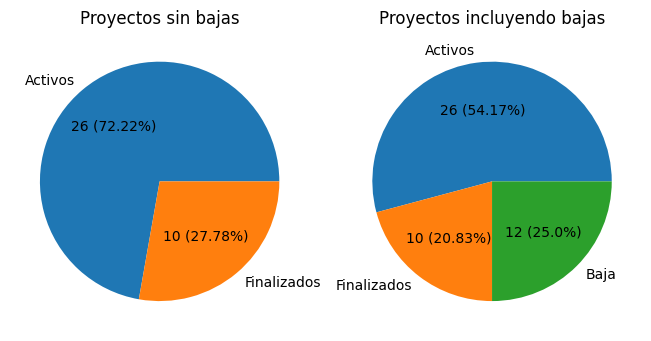

In [88]:

_, (left, right) = plt.subplots(1, 2, layout='constrained')

left.set(title='Proyectos sin bajas', aspect=1)
right.set(title='Proyectos incluyendo bajas', aspect=1)


x = (nactivos, nfinalizados)
left.pie(
    x, labels=('Activos', 'Finalizados'),
    autopct=lambda n: f'{round(n * totalSinBajas / 100)} ({round(n, 2)}%)')

x = (nactivos, nfinalizados, nbaja)
right.pie(
    x, labels=('Activos', 'Finalizados', 'Baja'),
    autopct=lambda n: f'{round(n * totalConBajas / 100)} ({round(n, 2)}%)')

plt.show()

In [89]:
print(
    'Proyectos:\n- {} Activos\n- {} Finalizados\n- {} Total\n- {} Total (con bajas)'.format(
        nactivos, nfinalizados, totalSinBajas, totalConBajas))

Proyectos:
- 26 Activos
- 10 Finalizados
- 36 Total
- 48 Total (con bajas)



#### Distribución de la duración de los proyectos (histograma)

In [90]:
proyectos['F_INICIO'] = pd.to_datetime(proyectos['F_INICIO'], format='%y-%m-%d')
proyectos['F_FIN'] = pd.to_datetime(proyectos['F_FIN'], format='%y-%m-%d')

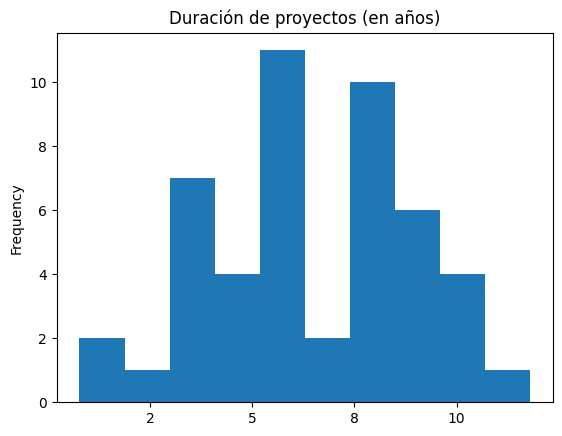

In [91]:
def form(delta, _):
    y = int(delta // 365)
    return f'{y}'

duraciones = (proyectos['F_FIN'] - proyectos['F_INICIO']).dt.days
p = duraciones.plot.hist()
p.xaxis.set_major_formatter(form)
p.set(title='Duración de proyectos (en años)')
plt.show()


#### Distribución de proyectos por lugar

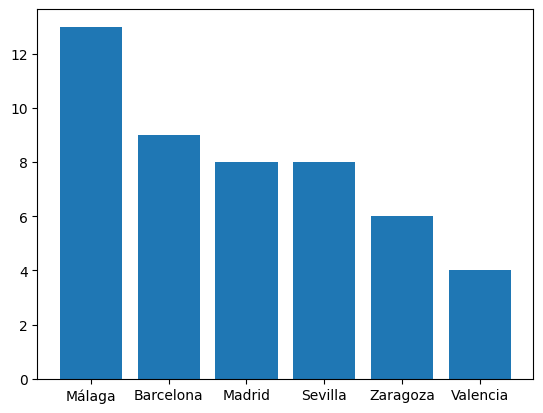

In [92]:
lugares = proyectos['TX_LUGAR']
frecLugares = lugares.value_counts().reset_index()
plt.bar(frecLugares['TX_LUGAR'], frecLugares['count'])
plt.show()

### Proyectos y empleados

#### Distribución del número de proyectos a los que están asignados los empleados en activo. 

In [93]:
asignados = asignaciones['ID_EMPLEADO']
asignados = asignados.value_counts().reset_index()
asignados = asignados.groupby('count').count().reset_index()
print(
    ',\n'.join(
        f'- Personas asignadas a {c} proyecto{"s" if c != 1 else ""}: {n}'
        for c, n in zip(asignados['count'], asignados['ID_EMPLEADO'])
    ))

- Personas asignadas a 2 proyectos: 1,
- Personas asignadas a 3 proyectos: 4,
- Personas asignadas a 4 proyectos: 6,
- Personas asignadas a 5 proyectos: 14,
- Personas asignadas a 6 proyectos: 7



#### Top 5 proyectos con más personas asignadas

In [94]:
top5 = asignaciones['ID_PROYECTO']
top5 = (top5.value_counts(['ID_EMPLEADO']) * len(top5)).astype('int').reset_index()[:5]
top5proyectos = top5.join(
    proyectos[['ID_PROYECTO', 'TX_DESCRIPCION']],
    on='ID_PROYECTO',
    rsuffix='_new')[['ID_PROYECTO', 'TX_DESCRIPCION', 'proportion']]

top5proyectos

,ID_PROYECTO,TX_DESCRIPCION,proportion
0,23,Bare disappear special dust folks realize prac...,8
1,46,Program common bring who,8
2,1,Acres research fun track somehow,8
3,10,Cause member scale receive trail,7
4,30,Temperature price south stream create,7



#### Lista de proyectos sin personas asignadas (detección de anomalía) 

In [95]:
proyectosAsignados = asignaciones['ID_PROYECTO'].unique()
noasignados = ~proyectos['ID_PROYECTO'].isin(proyectosAsignados)

pnoasig = proyectos.loc[noasignados]
pnoasig.loc[pnoasig['F_BAJA'].isna()][['ID_PROYECTO', 'TX_DESCRIPCION', 'TX_OBSERVACIONES', 'TX_LUGAR', 'F_INICIO', 'F_FIN']]

,ID_PROYECTO,TX_DESCRIPCION,TX_OBSERVACIONES,TX_LUGAR,F_INICIO,F_FIN
4,4,Train inch raise are,Invented properly weak cookies needed hung bre...,Zaragoza,2026-11-03,2031-01-11
9,9,Knife nodded make terrible wait,Themselves answer today move wind local respec...,Málaga,2028-10-13,2036-12-01
14,14,Animal cross wish forest give deal,Since period getting youth making quickly vast...,Málaga,2027-10-04,2035-01-10
18,18,Swing whether grew classroom share member,Us accurate beautiful happy mad beat pain stat...,Zaragoza,2028-05-07,2029-03-09
